# RumexDemo Inference

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from utils.unet_utils import Model
from utils.dataset_utils import ImageViewer

## Load Model:

In [2]:
model = tf.keras.models.load_model('models/best_resnet50.h5',
                                   custom_objects={'dice_loss': Model.dice_loss,
                                                   'my_dice_metric_all': Model.my_dice_metric_all})

## Load Sample Image:

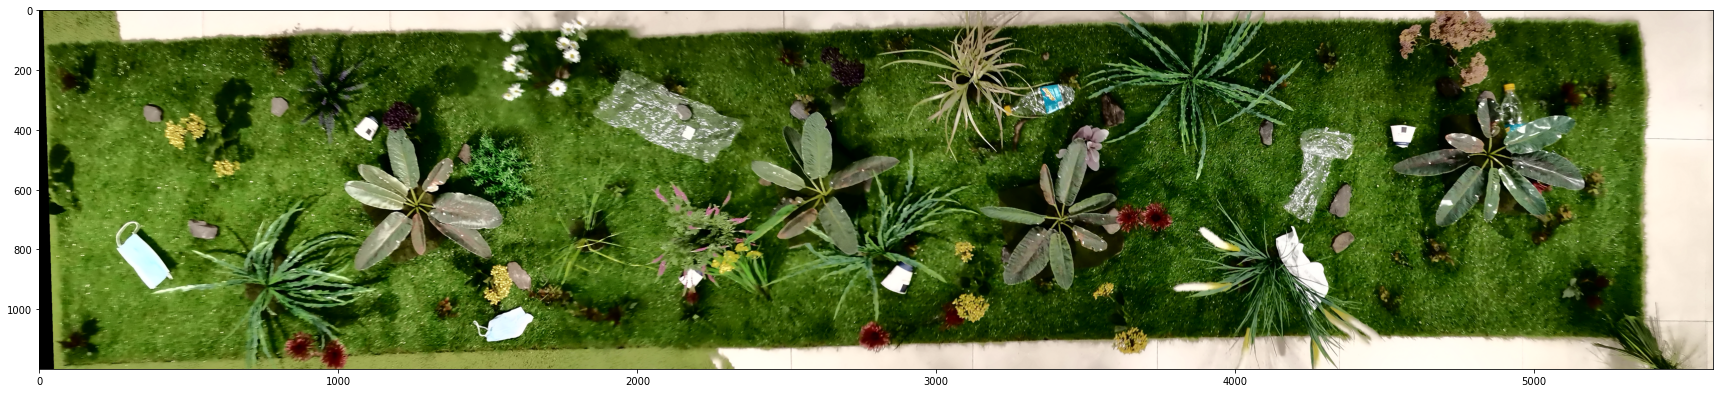

In [3]:
plt.figure(figsize=(30, 30))
img = plt.imread('data/inference/images/img_1102.png')
plt.imshow(img)

## Inference in single Image:

In [8]:
def predict_image(img):
    padded_image = np.zeros((1536, 5632, 3))
    padded_image[:1200, :5600] = img
    predicted_image = np.zeros_like(padded_image)
    for column in range(3):
        for row in range(11):
            inference_img = padded_image[column*512: column*512 + 512, row*512: row*512 + 512]
            inference_img = np.expand_dims(inference_img, axis=0)
            prediction = model(inference_img)
            predicted_image[column*512: column*512 + 512, row*512: row*512 + 512] = prediction

    return predicted_image[:1200, :5600]

predicted_image = predict_image(img)

### Result:

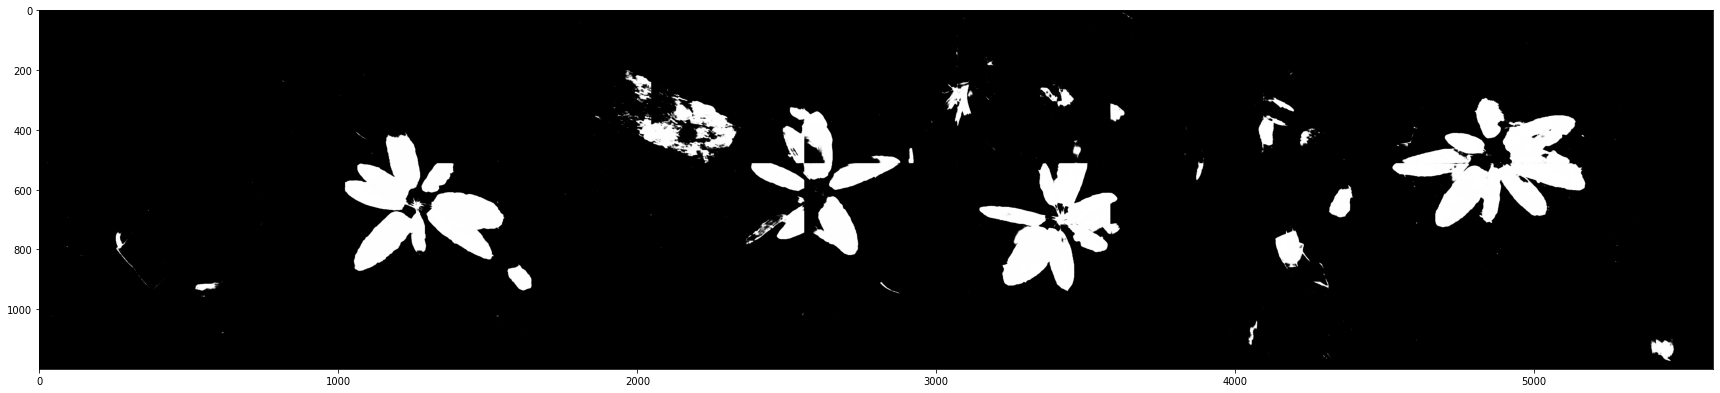

In [5]:
plt.figure(figsize=(30, 30))
plt.imshow(predicted_image)

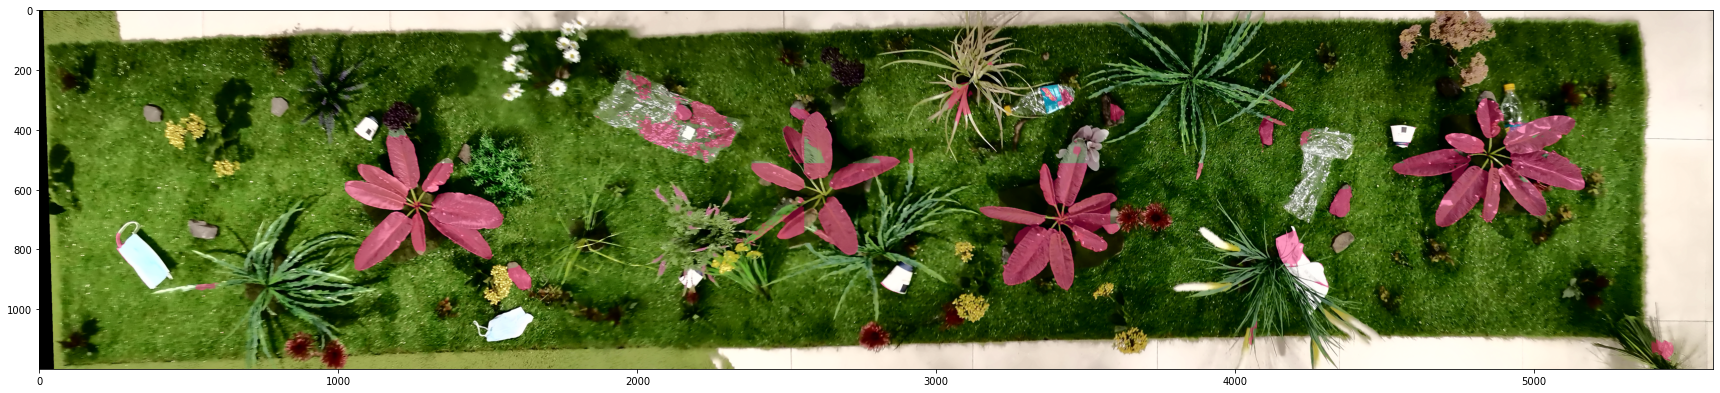

In [6]:
plt.figure(figsize=(30, 30))
im = ImageViewer()
im.show_pair(img=img, msk=predicted_image, alpha=0.7)

## Process all Images in Path:

In [7]:
def save_predictions(image_folder, inference_folder):
    image_list = os.listdir(image_folder)
    for image_file in image_list:
        print('Processing Image: {}'.format(image_file))
        img = plt.imread('{}/{}'.format(image_folder, image_file))
        prediction = predict_image(img)
        plt.imsave('{}/{}'.format(inference_folder, image_file), prediction)

save_predictions(image_folder='data/inference/images',
                 inference_folder='data/inference/predicted_masks')

Processing Image: img_1100.png
Processing Image: img_1102.png
Processing Image: img_1103.png
Processing Image: img_1104.png
Processing Image: img_1105.png
Processing Image: img_1106.png
Processing Image: img_1107.png
Processing Image: img_1109.png
Processing Image: img_1110.png
Processing Image: img_1111.png
Processing Image: img_1112.png
Processing Image: img_1113.png
Processing Image: img_1114.png
Processing Image: img_1115.png
Processing Image: img_1116.png
Processing Image: img_1117.png
Processing Image: img_1118.png
Processing Image: img_1119.png
Processing Image: img_1120.png
Processing Image: img_1121.png
Processing Image: img_1122.png
Processing Image: img_1123.png
Processing Image: img_1124.png
Processing Image: img_1125.png
Processing Image: img_1126.png
Processing Image: img_1127.png
Processing Image: img_1129.png
Processing Image: img_1132.png
Processing Image: img_1133.png
Processing Image: img_1134.png
Processing Image: img_1135.png
Processing Image: img_1136.png
Processi